In [1]:
#import dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from sklearn import datasets
import gmaps

#import api_key
api_key="e9f34fe30c3508b1804ca865ed96b3b4"



# Configure gmaps
gmaps.configure(api_key=api_key)


In [2]:
# Make a reference to the csv files needed

csv_path_all="Resources/marchseptember.csv"
csv_path_covid="Resources/completed_covid_cases_data.csv"



In [3]:
#read csv files

covid_df=pd.read_csv(csv_path_covid, encoding="utf-8")
city_df=pd.read_csv(csv_path_all, encoding="utf-8")





In [4]:
#Show dataframe for all cities
city_df

,Name,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98


In [5]:
#delete columns not needed
#del city_df["Wind Chill"]
#del city_df["Heat Index"]
#del city_df["Snow Depth"]
#del city_df["Visibility"]

In [6]:
#clean headers
city_df=city_df.rename(columns={"Period":"month"})


city_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98


In [7]:
#create dataframe grouped by City and Month
month_temp=city_df.groupby(["Name", "month"])
month_temp.head()

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98


In [8]:
#find just detroit information and create dataframe
det_df=city_df.loc[city_df["Name"] == "Detroit", :]
det_df

,Name,month,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity
49,Detroit,3,63.6,20.6,40.5,12.0,NaN,2.79,NaN,31.8,52.8,8.6,34.1,72.02
50,Detroit,4,70.0,25.8,44.9,18.0,NaN,1.76,NaN,29.6,49.4,8.8,31.7,64.55
51,Detroit,5,88.8,30.1,57.3,21.0,90.6,3.34,NaN,23.4,43.6,9.0,27.1,65.69
52,Detroit,6,91.5,47.6,71.4,44.7,98.0,3.90,NaN,28.8,47.2,9.3,13.5,60.45
53,Detroit,7,93.5,62.8,77.4,NaN,98.9,4.93,NaN,16.7,37.8,9.2,14.8,67.06
54,Detroit,8,92.3,57.4,73.2,NaN,97.3,6.74,NaN,19.9,34.4,9.2,16.7,68.78
55,Detroit,9,83.7,39.1,63.7,36.5,86.5,2.55,NaN,23.7,40.3,8.9,19.9,71.62


In [9]:
#read and clean COVID data
covid_df

,Unnamed: 0,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,...,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,...,1042,2511.000,8.0500,-0.2910,-0.1170,-0.0557,-0.431,-0.37300,0.1200,-0.1420
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,...,250,2902.000,3.0800,-0.2200,-0.0590,0.8120,-0.379,-0.41300,0.1020,-0.1110
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,...,343,2971.000,12.0000,-0.1570,-0.0886,0.2340,-0.336,-0.35600,0.0843,-0.0959
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,...,133,920.000,3.9700,-0.2500,-0.1060,0.7110,-0.503,-0.46900,0.1360,-0.1490
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,...,261,1894.000,10.5000,-0.0771,-0.0614,NaN,-0.350,-0.34600,0.0614,-0.0638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,...,6,4.200,0.4210,-0.2190,0.0829,-0.1360,-0.343,-0.22900,0.1110,-0.1410
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,...,4,3.860,0.3910,-0.0957,0.1460,0.1960,-0.193,-0.07860,0.0386,-0.0517
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,...,5,3.850,0.5110,-0.0643,0.2410,0.3140,-0.160,-0.02290,0.0243,-0.0365
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,...,5,0.478,0.0684,-0.0286,0.1300,-0.0729,-0.123,-0.00571,0.0214,-0.0334


In [10]:
#Clean and Rename Headers
covid_data=covid_df.rename(columns={"cityid":"City ID", "cityname":"Name",
                                    "stateabbrev":"Abbreviation","statename":"State Name",
                                   "city_pop2019": "City Population", "year": "Year",
                                   "new_case_count": "New Case Count", "case_rate": "Case Rate",
                                   "new_case_rate": "New Case Rate", "case_count": "Case Count"})

del covid_data["gps_retail_and_recreation"]
del covid_data["gps_grocery_and_pharmacy"]
del covid_data["gps_parks"]
del covid_data["gps_transit_stations"]
del covid_data["gps_workplaces"]
del covid_data["gps_residential"]
del covid_data["gps_away_from_home"]







covid_data

,Unnamed: 0,City ID,Name,Abbreviation,State Name,statefips,City Population,Year,month,day,Case Count,New Case Count,Case Rate,New Case Rate
0,200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,1042,2511.000,8.0500
1,401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,250,2902.000,3.0800
2,602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,343,2971.000,12.0000
3,803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,133,920.000,3.9700
4,1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,261,1894.000,10.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,6,4.200,0.4210
1806,1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,4,3.860,0.3910
1807,1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,5,3.850,0.5110
1808,1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,5,0.478,0.0684


In [11]:
#Create Monthed groupby and monthly sums
month_covid=covid_data.groupby(["Name", "month"])
month_covid.sum()



Unnamed: 0  City ID  statefips  City Population   Year  day  \
Name    month                                                                
Boston  3           20978      425        425         13666419  34340  391   
        4           37725      750        750         24117210  60600  465   
        5           39928      775        775         24921117  62620  496   
        6           39555      750        750         24117210  60600  465   
        7           41819      775        775         24921117  62620  496   
...                   ...      ...        ...              ...    ...  ...   
Seattle 5           21235      279       1643         69836242  62620  496   
        6           21465      270       1590         67583460  60600  465   
        7           23126      279       1643         69836242  62620  496   
        8           24087      279       1643         69836242  62620  496   
        9            8778       99        583         24780602  22220   66   

               Case Count  New Case Count  Case Rate  New Case Rate  
Name    month                                                        
Boston  3            6639            1346      826.5         98.821  
        4          205735           11517    25591.0       1372.600  
        5          497778            5046    61920.0        727.920  
        6          579350            1883    72065.0        253.500  
        7          634468            1403    78923.0        156.210  
...                   ...             ...        ...            ...  
Seattle 5          228112            1851    10126.0         88.560  
        6          269119            2037    11950.0         81.680  
        7          393928            5018    17487.0        218.600  
        8          546508            4468    24259.0        203.010  
        9          222507            1034     9878.0         48.300  

[70 rows x 10 columns]

In [12]:
# Converting a GroupBy object into a DataFrame
month_new_case = pd.DataFrame(month_covid["New Case Count"].sum())

month_new_case.reset_index()

,Name,month,New Case Count
0,Boston,3,1346
1,Boston,4,11517
2,Boston,5,5046
3,Boston,6,1883
4,Boston,7,1403
...,...,...,...
65,Seattle,5,1851
66,Seattle,6,2037
67,Seattle,7,5018
68,Seattle,8,4468


In [13]:
#converting temperature data in to a dtaframe
city_month_temp = pd.DataFrame(month_temp["Temperature"].sum())
city_month_temp.reset_index()

,Name,month,Temperature
0,Boston,3,42.8
1,Boston,4,45.9
2,Boston,5,58.0
3,Boston,6,69.5
4,Boston,7,75.5
...,...,...,...
65,Seattle,5,59.0
66,Seattle,6,61.7
67,Seattle,7,66.8
68,Seattle,8,67.8


In [14]:
#write to csvs
city_month_temp.to_csv("Resources/city_month_temp_1.csv", index=True, header=True)
month_new_case.to_csv("Resources/month_new_case_1.csv", index=True, header=True)

csv_path_merge="Resources/temp_new_cases_combined.csv"
merge_df=pd.read_csv(csv_path_merge, encoding="utf-8")

merge_df=merge_df.rename(columns={"new_case_count": "New Case Count", "temperature": "Temperature"})
merge_df

,Name,month,New Case Count,Temperature
0,Boston,3,1346,42.8
1,Boston,4,11517,45.9
2,Boston,5,5046,58.0
3,Boston,6,1883,69.5
4,Boston,7,1403,75.5
...,...,...,...,...
65,Seattle,5,1851,59.0
66,Seattle,6,2037,61.7
67,Seattle,7,5018,66.8
68,Seattle,8,4468,67.8


# Scatterplots

The first scatterplot will show the correlation between the Average Temperature of each city and the New Case Count for the respective month. 

The r-value is: 0.0024976965524163915
y = 92.14x + 5825.1


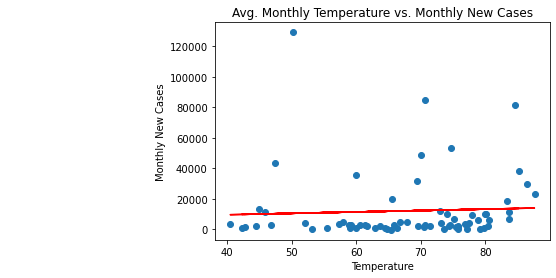

In [15]:
# Add the linear regression equation and line to plot
x_values = merge_df['Temperature']
y_values = merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [16]:
#Create a dataframe for Detroit Data
detroit_merge=merge_df.loc[merge_df["Name"]=="Detroit",:]
detroit_merge

,Name,month,New Case Count,Temperature
21,Detroit,3,3727,40.5
22,Detroit,4,13014,44.9
23,Detroit,5,3689,57.3
24,Detroit,6,2353,71.4
25,Detroit,7,4301,77.4
26,Detroit,8,4164,73.2
27,Detroit,9,1882,63.7


The below scatterplot will show the correlation between the Average Monthly Temperature for Detroit specifically in comparison to the total number of New Cases for the respective month.


The r-value is: 0.23151234711800697
y = -126.67x + 12485.15


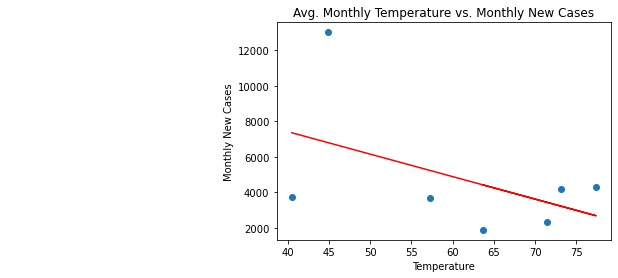

In [17]:
# Add the linear regression equation and line to plot
x_values = detroit_merge['Temperature']
y_values = detroit_merge['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Temperature vs. Monthly New Cases")
plt.xlabel('Temperature')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [18]:
#Creat a dataframe for the monthly Relative Humidity
city_month_humidity = pd.DataFrame(month_temp["Relative Humidity"].sum())
city_month_humidity.reset_index()




,Name,month,Relative Humidity
0,Boston,3,57.33
1,Boston,4,59.53
2,Boston,5,57.51
3,Boston,6,64.90
4,Boston,7,70.02
...,...,...,...
65,Seattle,5,63.60
66,Seattle,6,66.02
67,Seattle,7,60.34
68,Seattle,8,59.93


In [19]:
#Write to CSV
city_month_humidity.to_csv("Resources/city_month_humidity_1.csv", index=True, header=True)

csv_path_humidity="Resources/humidity_new_cases_combined.csv"
humidity_merge_df=pd.read_csv(csv_path_humidity, encoding="utf-8")

humidity_merge_df=humidity_merge_df.rename(columns={"new_case_count": "New Case Count"})


humidity_merge_df

,Name,month,New Case Count,Relative Humidity
0,Boston,3,1346,57.33
1,Boston,4,11517,59.53
2,Boston,5,5046,57.51
3,Boston,6,1883,64.90
4,Boston,7,1403,70.02
...,...,...,...,...
65,Seattle,5,1851,63.60
66,Seattle,6,2037,66.02
67,Seattle,7,5018,60.34
68,Seattle,8,4468,59.93


The below scatterplot will show the correlation between the Relative Humidity Average per month for each city in comparison to the total amount of new cases for that respective month. 

The r-value is: 0.03481520600791169
y = 204.2x + 513.93


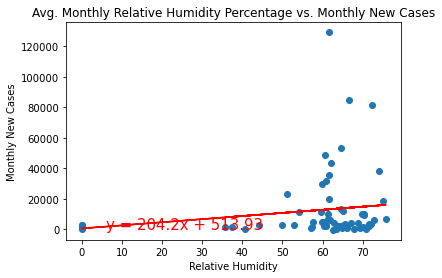

In [20]:
# Add the linear regression equation and line to plot
x_values = humidity_merge_df['Relative Humidity']
y_values = humidity_merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Avg. Monthly Relative Humidity Percentage vs. Monthly New Cases")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

In [21]:
#Create a detroit humidity dataframe
detroit_humidity=humidity_merge_df.loc[merge_df["Name"]=="Detroit",:]

detroit_humidity

,Name,month,New Case Count,Relative Humidity
21,Detroit,3,3727,72.02
22,Detroit,4,13014,64.55
23,Detroit,5,3689,65.69
24,Detroit,6,2353,60.45
25,Detroit,7,4301,67.06
26,Detroit,8,4164,68.78
27,Detroit,9,1882,71.62


The below scatterplot will show the correlation between the Relative Humidity of Detroit by month in comparison to the total new cases for that respective month. 

The r-value is: 0.05997634865660759
y = -225.6x + 19885.77


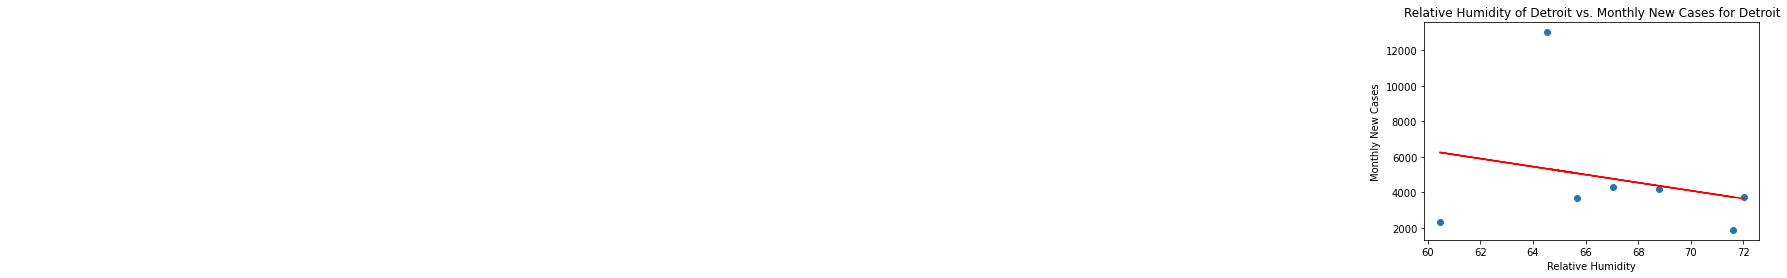

In [22]:
# Add the linear regression equation and line to plot
x_values = detroit_humidity['Relative Humidity']
y_values = detroit_humidity['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Relative Humidity of Detroit vs. Monthly New Cases for Detroit")
plt.xlabel('Relative Humidity')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

# CITIES API PULL

In [23]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key="e9f34fe30c3508b1804ca865ed96b3b4"

# Build partial query URL
query_url = f"{url}appid={api_key}&q="

In [24]:
cities = ["Boston", "Dallas", "Denver", "Detroit", "Honolulu", "Los Angeles", "Miami", "New York City", "San Francisco", "Seattle"]

# set up lists to hold reponse info
lat = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])


print(f"The latitude information received is: {lat}")


The latitude information received is: [42.36, 32.77, 39.74, 42.33, 21.31, 34.05, 25.77, 40.71, 37.77, 47.61]


In [25]:
# create a data frame from cities and lat
lat_dict = {
    "city": cities,
    "lat": lat,
}
lat_data = pd.DataFrame(lat_dict)

lat_data=lat_data.rename(columns={"city":"Name"})

lat_data

,Name,lat
0,Boston,42.36
1,Dallas,32.77
2,Denver,39.74
3,Detroit,42.33
4,Honolulu,21.31
5,Los Angeles,34.05
6,Miami,25.77
7,New York City,40.71
8,San Francisco,37.77
9,Seattle,47.61


month_new_case.sum()

In [26]:
month_sums=month_new_case.groupby("Name").sum()
month_sums.reset_index()

,Name,New Case Count
0,Boston,23005
1,Dallas,78280
2,Denver,11662
3,Detroit,33130
4,Honolulu,9501
5,Los Angeles,252013
6,Miami,163366
7,New York City,241667
8,San Francisco,10160
9,Seattle,20329


In [27]:
# Merge two dataframes using an outer join
lat_merge_df = pd.merge(lat_data, month_sums, on="Name", how="outer")
lat_merge_df

,Name,lat,New Case Count
0,Boston,42.36,23005
1,Dallas,32.77,78280
2,Denver,39.74,11662
3,Detroit,42.33,33130
4,Honolulu,21.31,9501
5,Los Angeles,34.05,252013
6,Miami,25.77,163366
7,New York City,40.71,241667
8,San Francisco,37.77,10160
9,Seattle,47.61,20329


The below scatterplot will show a correlation between the Latitude of each respective city and their total Covid New Cases from March til September 2020. 

The r-value is: 0.025536433591689955
y = -1933.84x + 154784.39


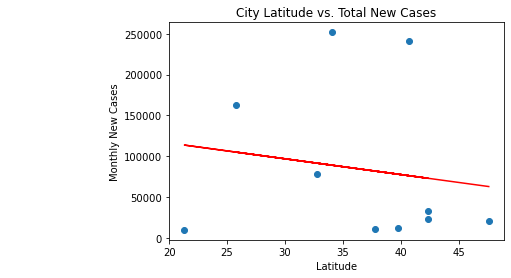

In [28]:
# Add the linear regression equation and line to plot
x_values = lat_merge_df['lat']
y_values = lat_merge_df['New Case Count']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("City Latitude vs. Total New Cases")
plt.xlabel('Latitude')
plt.ylabel('Monthly New Cases')
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

# Insert Google HeatMap - Tuesday